In [31]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
del sys.path[0]
sys.path.insert(0, module_path)

In [32]:
sys.path

['/home/artem/Desktop/programming/bayesian_optimization',
 '/home/artem/anaconda3/lib/python38.zip',
 '/home/artem/anaconda3/lib/python3.8',
 '/home/artem/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/home/artem/anaconda3/lib/python3.8/site-packages',
 '/home/artem/anaconda3/lib/python3.8/site-packages/deminf_data-0.0.0-py3.8.egg',
 '/home/artem/anaconda3/lib/python3.8/site-packages/moments-1.0.9-py3.8-linux-x86_64.egg',
 '/home/artem/anaconda3/lib/python3.8/site-packages/GPyOpt-1.2.6-py3.8.egg',
 '/home/artem/anaconda3/lib/python3.8/site-packages/gadma-2.0.0rc11.dev6-py3.8.egg',
 '/home/artem/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/home/artem/.ipython']

# Model's Comparison

In [50]:
import pickle
import numpy as np
import math

In [44]:
with open('data/compare_list_BayesianOptimization_saved.pickle', 'rb') as fp:
    BayesianOptimization_Y_best = pickle.load(fp)
with open('data/compare_list_GeneticAlgoritm_saved.pickle', 'rb') as fp:
    GeneticAlgorithm_Y_best = pickle.load(fp)

In [53]:
assert len(BayesianOptimization_Y_best) == len(GeneticAlgorithm_Y_best)
assert len(BayesianOptimization_Y_best[0]) == len(GeneticAlgorithm_Y_best[0])

In [54]:
num_run= len(BayesianOptimization_Y_best)
num_evaluation = len(BayesianOptimization_Y_best[0])

In [55]:
def get_confidence_interval(arr, alpha):
    arr = sorted(arr)
    n = len(arr)
    return arr[int((1 - alpha) / 2) * n], arr[min(math.ceil(((1 + alpha) / 2) * n), n - 1)] 

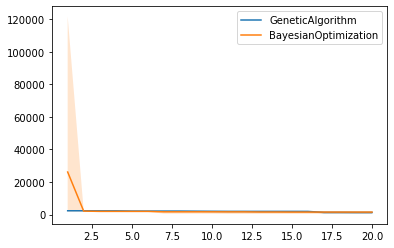

In [56]:
alpha = 0.5

GeneticAlgorithm_Y_best = np.array(GeneticAlgorithm_Y_best)
BayesianOptimization_Y_best = np.array(BayesianOptimization_Y_best)



GeneticAlgorithm_Y_best_mean = np.mean(GeneticAlgorithm_Y_best, axis=0)
BayesianOptimization_Y_best_mean = np.mean(BayesianOptimization_Y_best, axis=0)

GeneticAlgorithm_Y_best_range_low = []
GeneticAlgorithm_Y_best_range_high = []
for i in range(num_evaluation):
    low, high = get_confidence_interval(GeneticAlgorithm_Y_best[:, i].flatten(), alpha=alpha)
    GeneticAlgorithm_Y_best_range_low.append(low)
    GeneticAlgorithm_Y_best_range_high.append(high)
                                              
BayesianOptimization_Y_best_range_low = []
BayesianOptimization_Y_best_range_high = []
for i in range(num_evaluation):
    low, high = get_confidence_interval(BayesianOptimization_Y_best[:, i].flatten(), alpha=alpha)
    BayesianOptimization_Y_best_range_low.append(low)
    BayesianOptimization_Y_best_range_high.append(high)

plt.plot(range(1, num_evaluation + 1), GeneticAlgorithm_Y_best_mean, label='GeneticAlgorithm')
plt.fill_between(range(1, num_evaluation + 1),
                 GeneticAlgorithm_Y_best_range_low, GeneticAlgorithm_Y_best_range_high, alpha=0.2)
plt.plot(range(1, num_evaluation + 1), BayesianOptimization_Y_best_mean, label='BayesianOptimization')
plt.fill_between(range(1, num_evaluation + 1), 
                 BayesianOptimization_Y_best_range_low, BayesianOptimization_Y_best_range_high, alpha=0.2)
plt.legend()